In [86]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

# Population totals and age splits in Europe

This notebook only serves the purpose of looking at the data and possibly manipulating it for purposes.

### Original data - from Eurostat

* Population structure - from http://ec.europa.eu/eurostat/web/products-datasets/-/tps00010
* Population totals - from http://ec.europa.eu/eurostat/tgm/table.do?tab=table&language=en&pcode=tps00001&tableSelection=1&footnotes=yes&labeling=labels&plugin=1

See the README for details.

## Read the data - reformat as needed

The data has been extracted in a CSV format directly from the page - from the page, all the 28 member states' data plus the EU as a whole have been selected. Time frames are those available at the time of doing this: 2008 to 2017.

In [155]:
cc_df = pd.read_csv('original_data/country_codes.csv')
age_df = pd.read_csv('original_data/population_age_structure/demo_pjanind_1_Data.csv')
tot_df = pd.read_csv('original_data/population_totals/tps00001.tsv', sep='\t')

In [156]:
len(cc_df)
cc_df.head(2)

,Code,Country language,English,French,German
0,BE,Belgique/België,Belgium,Belgique,Belgien
1,BG,Bulgarija,Bulgaria,Bulgarie,Bulgarien


In [157]:
age_df.head(10)

,TIME,GEO,INDIC_DE,Value,Flag and Footnotes
0,2008,European Union (current composition),Median age of population,40.4,NaN
1,2008,European Union (current composition),Proportion of population aged 0-19 years,21.8,NaN
2,2008,European Union (current composition),Proportion of population aged 20-39 years,27.6,NaN
3,2008,European Union (current composition),Proportion of population aged 40-59 years,28.1,NaN
4,2008,European Union (current composition),Proportion of population aged 60-79 years,18.2,NaN
5,2008,European Union (current composition),Proportion of population aged 80 years and more,4.4,NaN
6,2008,Belgium,Median age of population,40.7,NaN
7,2008,Belgium,Proportion of population aged 0-19 years,23.0,NaN
8,2008,Belgium,Proportion of population aged 20-39 years,26.0,NaN
9,2008,Belgium,Proportion of population aged 40-59 years,28.4,NaN


In [158]:
age_df.dtypes

TIME                    int64
GEO                    object
INDIC_DE               object
Value                 float64
Flag and Footnotes     object
dtype: object

In [159]:
len(age_df)

1740

In [160]:
age_df['GEO'].unique()

array(['European Union (current composition)', 'Belgium', 'Bulgaria',
       'Czech Republic', 'Denmark', 'Germany including former GDR',
       'Estonia', 'Ireland', 'Greece', 'Spain', 'France', 'Croatia',
       'Italy', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary',
       'Malta', 'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'United Kingdom'],
      dtype=object)

In [353]:
tot_df.head(10)

,Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,English
0,AD,78549.0,81222.0,83137.0,84484.0,84082.0,78115.0,78115.0,76246.0,NaN,NaN,71732.0,73105.0,NaN
1,AL,3003329.0,2981755.0,2958266.0,2936355.0,2918674.0,2907361.0,2903008.0,2897770.0,2892394.0,2892302.0,2886026.0,2876591.0,NaN
2,AM,3219234.0,3222953.0,3230086.0,3237976.0,3249482.0,3262650.0,3274285.0,3026878.0,NaN,3010598.0,2998577.0,2986151.0,NaN
3,AT,8254298.0,8282984.0,8307989.0,8335003.0,8351643.0,8375164.0,8408121.0,8451860.0,8507786.0,8584926.0,8700471.0,8772865.0,Austria
4,AZ,8436400.0,8532700.0,8629900.0,8896900.0,8997586.0,9111078.0,9235085.0,9356483.0,9477119.0,9593038.0,9705643.0,9809981.0,NaN
5,BA,3842650.0,3844017.0,3843846.0,3843998.0,3844046.0,3843183.0,3839265.0,3835645.0,3830911.0,3825334.0,3515982.0,3509728.0,NaN
6,BE,10511382.0,10584534.0,10666866.0,10753080.0,10839905.0,11000638.0,11075889.0,11137974.0,11180840.0,11237274.0,11311117.0,11351727.0,Belgium
7,BG,7629371.0,7572673.0,7518002.0,7467119.0,7421766.0,7369431.0,7327224.0,7284552.0,7245677.0,7202198.0,7153784.0,7101859.0,Bulgaria
8,BY,9750540.0,9714461.0,9689770.0,9671912.0,9480178.0,9481193.0,9465150.0,9463840.0,9468154.0,9480868.0,9498364.0,9504704.0,NaN
9,CH,7459128.0,7508739.0,7593494.0,7701856.0,7785806.0,7870134.0,7954662.0,8039060.0,8139631.0,8237666.0,8327126.0,8419550.0,NaN


### Some manipulations on the totals df

In [162]:
## Remove the "JAN" from the col in tot_df
tot_df['indic_de,geo\\time'] = tot_df['indic_de,geo\\time'].apply(lambda row: row.split(',')[1])

## Rename this col 
tot_df = tot_df.rename(columns={'indic_de,geo\\time': 'Code'})

In [163]:
## year cols are named like "2008 ", remove the space
tot_df = tot_df.rename(columns={
    col: col.replace(' ', '') for col in tot_df.columns
})

In [164]:
## Join tot_df witht he country codes so to have names (the other uses names)

tot_df = tot_df.merge(cc_df[['Code', 'English']], how='left', on="Code")

In [165]:
## Remove the explanatory flags near the numbers and tranforms into numeric
# (for flags explanation see the labels dataset in the pop_structure folder)
# - this means we use numbers as equivalent - estimations as it were real

for col in [k for k in tot_df.columns if '20' in k]:
    tot_df[col] = tot_df[col].apply(lambda row: row.split(' ')[0])
    tot_df[col] = pd.to_numeric(tot_df[col], errors='coerce')


## Build a dataset for the EU as a whole

The goal is to see the evolution in the years of the population in the EU as a whole, and the % splits in age brackets. Note that the same can be applied to any country.

### Check the sums of all countries' totals and the EU28 one

Countries have joined the EU in different years, and the first year for which we have data is 2006, not all the current 28 members were there at that time. Suspect is the EU28 row in tot_df gives the aggregated counts of all 28 current member states even if at the time they were not members of the EU, but checking this.

Note that for the proportions in the age dataset, we will assume this is also the case, due to the phrasing "European Union (current composition)" - there isn't a straightforward way to check this.

In [166]:
len(tot_df)

54

In [167]:
### Check country totals amount to the EU 28 ones

tmp_df = tot_df[~tot_df['English'].isnull()]    # those for countries, will have non-null cols

In [168]:
len(tmp_df)

28

In [169]:
tmp_df.head()

,Code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,English
3,AT,8254298.0,8282984.0,8307989.0,8335003.0,8351643.0,8375164.0,8408121.0,8451860.0,8507786.0,8584926.0,8700471.0,8772865.0,Austria
6,BE,10511382.0,10584534.0,10666866.0,10753080.0,10839905.0,11000638.0,11075889.0,11137974.0,11180840.0,11237274.0,11311117.0,11351727.0,Belgium
7,BG,7629371.0,7572673.0,7518002.0,7467119.0,7421766.0,7369431.0,7327224.0,7284552.0,7245677.0,7202198.0,7153784.0,7101859.0,Bulgaria
10,CY,744013.0,757916.0,776333.0,796930.0,819140.0,839751.0,862011.0,865878.0,858000.0,847008.0,848319.0,854802.0,Cyprus
11,CZ,10223577.0,10254233.0,10343422.0,10425783.0,10462088.0,10486731.0,10505445.0,10516125.0,10512419.0,10538275.0,10553843.0,10578820.0,Czech Republic


In [173]:
# compute the sums of all years into a dict
sums = {col: tmp_df[col].sum() for col in tmp_df.columns if '20' in col}

In [174]:
sums

{'2006': 496436597.0,
 '2007': 498300775.0,
 '2008': 500297033.0,
 '2009': 502090235.0,
 '2010': 503170618.0,
 '2011': 502964837.0,
 '2012': 504047964.0,
 '2013': 505163008.0,
 '2014': 507011330.0,
 '2015': 508540103.0,
 '2016': 510277177.0,
 '2017': 511522671.0}

In [183]:
tot_df[tot_df['Code'] == 'EU28']

20    498300775.0
Name: 2007, dtype: float64

The sums coincide with the row for EU28, which means that row reports the sums of the countries' totals even when they were not part of the EU.

### Build the dataset for the EU28

With the specifics from the step above

In [207]:
years = [col for col in tot_df.columns if '20' in col]
years.remove('2006')   # remove 2006 and 2007 as we lack pop structure for those years
years.remove('2007')

eu28_df = pd.DataFrame(
    {
        'year': years,
        'pop_tot': [list(tot_df[tot_df['Code'] == 'EU28'][year])[0] for year in years],
        'median_age': [list(age_df[(age_df['INDIC_DE'] == 'Median age of population') &
                             (age_df['GEO'] == 'European Union (current composition)') &
                             (age_df['TIME'] == int(year))
                            ]['Value'])[0] for year in years],
        '%pop_0-19': [list(age_df[(age_df['INDIC_DE'] == 'Proportion of population aged 0-19 years') &
                             (age_df['GEO'] == 'European Union (current composition)') &
                             (age_df['TIME'] == int(year))
                            ]['Value'])[0] for year in years],
        '%pop_20-39': [list(age_df[(age_df['INDIC_DE'] == 'Proportion of population aged 20-39 years') &
                             (age_df['GEO'] == 'European Union (current composition)') &
                             (age_df['TIME'] == int(year))
                            ]['Value'])[0] for year in years],
        '%pop_40-59': [list(age_df[(age_df['INDIC_DE'] == 'Proportion of population aged 40-59 years') &
                             (age_df['GEO'] == 'European Union (current composition)') &
                             (age_df['TIME'] == int(year))
                            ]['Value'])[0] for year in years],
        '%pop_60-79': [list(age_df[(age_df['INDIC_DE'] == 'Proportion of population aged 60-79 years') &
                             (age_df['GEO'] == 'European Union (current composition)') &
                             (age_df['TIME'] == int(year))
                            ]['Value'])[0] for year in years],
        '%pop_80plus': [list(age_df[(age_df['INDIC_DE'] == 'Proportion of population aged 80 years and more') &
                             (age_df['GEO'] == 'European Union (current composition)') &
                             (age_df['TIME'] == int(year))
                            ]['Value'])[0] for year in years],
    }
)

In [373]:
eu28_df

,%pop_0-19,%pop_20-39,%pop_40-59,%pop_60-79,%pop_80plus,median_age,pop_tot,year
0,21.8,27.6,28.1,18.2,4.4,40.4,500297033.0,2008
1,21.6,27.3,28.2,18.4,4.5,40.7,502090235.0,2009
2,21.5,27.0,28.3,18.6,4.7,41.0,503170618.0,2010
3,21.3,26.7,28.3,18.8,4.8,41.3,502964837.0,2011
4,21.2,26.5,28.4,19.0,4.9,41.6,504047964.0,2012
5,21.1,26.2,28.4,19.3,5.0,41.9,505163008.0,2013
6,21.0,25.9,28.5,19.5,5.1,42.2,507011330.0,2014
7,20.9,25.7,28.4,19.7,5.3,42.4,508540103.0,2015
8,20.9,25.4,28.4,19.9,5.4,42.6,510277177.0,2016
9,20.9,25.2,28.3,20.2,5.5,42.8,511522671.0,2017


In [236]:
# can do the same for a chosen country

country = 'Ireland'
country_code = 'IE'

country_df = pd.DataFrame(
    {
        'year': years,
        'pop_tot': [list(tot_df[tot_df['Code'] == country_code][year])[0] for year in years],
        'median_age': [list(age_df[(age_df['INDIC_DE'] == 'Median age of population') &
                             (age_df['GEO'] == country) &
                             (age_df['TIME'] == int(year))
                            ]['Value'])[0] for year in years],
        '%pop_0-19': [list(age_df[(age_df['INDIC_DE'] == 'Proportion of population aged 0-19 years') &
                             (age_df['GEO'] == country) &
                             (age_df['TIME'] == int(year))
                            ]['Value'])[0] for year in years],
        '%pop_20-39': [list(age_df[(age_df['INDIC_DE'] == 'Proportion of population aged 20-39 years') &
                             (age_df['GEO'] == country) &
                             (age_df['TIME'] == int(year))
                            ]['Value'])[0] for year in years],
        '%pop_40-59': [list(age_df[(age_df['INDIC_DE'] == 'Proportion of population aged 40-59 years') &
                             (age_df['GEO'] == country) &
                             (age_df['TIME'] == int(year))
                            ]['Value'])[0] for year in years],
        '%pop_60-79': [list(age_df[(age_df['INDIC_DE'] == 'Proportion of population aged 60-79 years') &
                             (age_df['GEO'] == country) &
                             (age_df['TIME'] == int(year))
                            ]['Value'])[0] for year in years],
        '%pop_80plus': [list(age_df[(age_df['INDIC_DE'] == 'Proportion of population aged 80 years and more') &
                             (age_df['GEO'] == country) &
                             (age_df['TIME'] == int(year))
                            ]['Value'])[0] for year in years],
    }
)

In [237]:
country_df

,%pop_0-19,%pop_20-39,%pop_40-59,%pop_60-79,%pop_80plus,median_age,pop_tot,year
0,27.0,33.5,24.4,12.6,2.6,33.4,4457765.0,2008
1,27.1,32.9,24.5,12.8,2.7,33.6,4521322.0,2009
2,27.3,32.1,24.7,13.2,2.7,34.0,4549428.0,2010
3,27.4,31.3,25.0,13.5,2.8,34.5,4570881.0,2011
4,27.6,30.3,25.4,13.8,2.9,35.0,4589287.0,2012
5,27.9,29.2,25.8,14.2,2.9,35.5,4609779.0,2013
6,27.7,28.9,25.9,14.5,3.0,35.8,4637852.0,2014
7,27.7,28.4,26.1,14.8,3.0,36.2,4677627.0,2015
8,27.6,27.9,26.3,15.1,3.1,36.5,4726286.0,2016
9,27.5,27.5,26.5,15.4,3.2,36.9,4784383.0,2017


## Plot some stuff

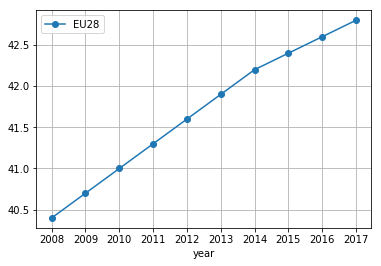

In [372]:
ax = eu28_df.plot('year', 'median_age', marker='o', label='EU28')
#country_df.plot('year', 'median_age', marker='o', ax=ax, label='country')

plt.xticks(range(len(years)), years)
plt.grid()
plt.show();

## Building a single df for all countries' data - years 2008 and 2017, median age, proportion of 0-19 and 20-39, and tot pop

In [376]:
# change "Germany including former GDR" into Germany - for the join later
age_df['GEO'] = age_df['GEO'].apply(lambda row: 'Germany' if row == 'Germany including former GDR' else row)

tmp1_df = age_df[(age_df['TIME'] == 2008) & (age_df['INDIC_DE'] == 'Median age of population')]  # median ae, 2008
tmp2_df = age_df[(age_df['TIME'] == 2017) & (age_df['INDIC_DE'] == 'Median age of population')]  # median age, 2017

tmp3_df = age_df[(age_df['TIME'] == 2017) & (age_df['INDIC_DE'] == 'Proportion of population aged 0-19 years')]  # prop 0-19, 2017

tmp4_df = age_df[(age_df['TIME'] == 2017) & (age_df['INDIC_DE'] == 'Proportion of population aged 20-39 years')]  # prop 0-19, 2017

In [377]:
countries_df = tot_df[['English', '2008']].merge(tmp1_df, left_on='English', right_on='GEO')[['English', '2008', "Value"]]
countries_df.columns = ['Country', 'pop_tot', 'median_age2008']

countries_df = countries_df.merge(tmp2_df, left_on='Country', right_on='GEO')[['Country', 'pop_tot', 'median_age2008', 'Value']]
countries_df = countries_df.rename(columns={'Value': 'median_age2017'})

countries_df = countries_df.merge(tmp3_df, left_on='Country', right_on='GEO')[['Country', 'pop_tot', 'median_age2008', 'median_age2017', 'Value']]
countries_df = countries_df.rename(columns={'Value': '%_0-19'})

countries_df = countries_df.merge(tmp4_df, left_on='Country', right_on='GEO')[['Country', 'pop_tot', 'median_age2008', 'median_age2017', '%_0-19', 'Value']]
countries_df = countries_df.rename(columns={'Value': '%_20-39'})

In [378]:
# difference in the medians

countries_df['medians_diff'] = countries_df['median_age2017'] - countries_df['median_age2008']

In [379]:
# sum of the proportions 0-19 and 20-39

countries_df['%_0-39'] = countries_df['%_0-19'] + countries_df['%_20-39']

In [380]:
countries_df.head(2)

,Country,pop_tot,median_age2008,median_age2017,%_0-19,%_20-39,medians_diff,%_0-39
0,Austria,8307989.0,40.9,43.0,19.6,26.5,2.1,46.1
1,Belgium,10666866.0,40.7,41.5,22.6,25.5,0.8,48.1


## Plot stuff

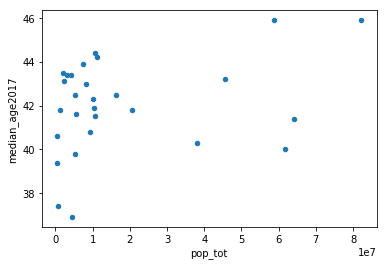

In [381]:
countries_df.plot('pop_tot', 'median_age2017', kind='scatter')

plt.show();

In [382]:
countries_df.corr()

,pop_tot,median_age2008,median_age2017,%_0-19,%_20-39,medians_diff,%_0-39
pop_tot,1.000000,0.257332,0.305917,-0.043296,-0.389198,0.112187,-0.284503
median_age2008,0.257332,1.000000,0.870211,-0.592509,-0.684465,-0.197905,-0.835919
median_age2017,0.305917,0.870211,1.000000,-0.730338,-0.777992,0.310715,-0.987097
%_0-19,-0.043296,-0.592509,-0.730338,1.000000,0.167923,-0.309961,0.760491
%_20-39,-0.389198,-0.684465,-0.777992,0.167923,1.000000,-0.227365,0.767832
medians_diff,0.112187,-0.197905,0.310715,-0.309961,-0.227365,1.000000,-0.351203
%_0-39,-0.284503,-0.835919,-0.987097,0.760491,0.767832,-0.351203,1.000000


In [383]:
# add a col for the sqrt of the population (helps for drawing a polar chart)
countries_df['sqrt_pop'] = np.sqrt(countries_df['pop_tot'])

# and a col for the squrt of the the proportion of the 0-39 population
countries_df['sqrt_0-39_pop'] = np.sqrt(countries_df['pop_tot'] * countries_df['%_0-39']/100)

In [386]:
countries_df.sort_values('medians_diff')

,Country,pop_tot,median_age2008,median_age2017,%_0-19,%_20-39,medians_diff,%_0-39,sqrt_pop,sqrt_0-39_pop
24,Sweden,9182927.0,40.6,40.8,22.9,26.1,0.2,49.0,3030.334470,2121.234129
1,Belgium,10666866.0,40.7,41.5,22.6,25.5,0.8,48.1,3266.016840,2265.118660
17,Luxembourg,483799.0,38.6,39.4,21.9,29.1,0.8,51.0,695.556612,496.726776
27,United Kingdom,61571647.0,39.1,40.0,23.5,26.4,0.9,49.9,7846.760287,5542.946135
10,Finland,5300484.0,41.5,42.5,21.7,25.2,1.0,46.9,2302.278002,1576.682275
19,Malta,407832.0,39.3,40.6,19.2,30.0,1.3,49.2,638.617256,447.943461
6,Denmark,5475791.0,40.2,41.6,22.8,25.0,1.4,47.8,2340.040812,1617.846747
12,Croatia,4311967.0,41.5,43.4,19.9,25.6,1.9,45.5,2076.527630,1400.694465
2,Bulgaria,7518002.0,41.9,43.9,18.5,25.5,2.0,44.0,2741.897518,1818.769056
3,Cyprus,776333.0,35.4,37.4,22.2,31.5,2.0,53.7,881.097611,645.670830
